## https://www.guruguru.science/competitions/17/discussions/c91c9c19-a907-4de9-89aa-294542758590/

In [1]:
import os

import pandas as pd
import numpy as np
from glob import  glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_dir = '/src/atmacup/atmacup11/data/inputs/'
photo_dir = os.path.join(input_dir, 'photos')
photo_pathes = glob(os.path.join(photo_dir, "*.jpg"))
output_dir = '/src/atmacup/atmacup11/data/outputs/'

os.makedirs(output_dir, exist_ok=True)

train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))

material_df = pd.read_csv(os.path.join(input_dir, 'materials.csv'))
technique_df = pd.read_csv(os.path.join(input_dir, 'techniques.csv'))

In [3]:
import re

#pip install ipynb-path
import ipynb_path

class Config:
    N_FOLDS = 5
    N_EPOCHS = 1
    NB_NAME = ''.join(re.findall('.*/(.*).ipynb', ipynb_path.get()))

In [4]:
from typing import List, Optional

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from tqdm import tqdm

pd.options.display.float_format = '{:.2f}'.format

In [7]:
def get_size_channel(jpg_file: str) -> List[int]:
    '''画像の高さ、幅、チャネル数を取得する。

    Parameters
    ----------
    jpg_file: str
        画像のファイルパス。

    Returns
    -------
    size_channel_info: List[int], length = 3
        [高さ, 幅, チャネル数]
    
    '''
    img = plt.imread(jpg_file)
    return [
        img.shape[0],
        img.shape[1],
        1 if img.ndim < 3 else img.shape[2]
    ]

In [10]:
size_channel_info = []
for jpg_file in tqdm(photo_pathes):
    img = plt.imread(jpg_file)
    assert(img.ndim == 3)
    size_channel_info.append([img.shape[0],
                              img.shape[1],
                              img.shape[2]])

100%|██████████| 9856/9856 [00:24<00:00, 408.12it/s]


In [11]:
size_channel_info

[[169, 224, 3],
 [224, 161, 3],
 [175, 224, 3],
 [109, 224, 3],
 [164, 224, 3],
 [224, 158, 3],
 [224, 152, 3],
 [224, 174, 3],
 [224, 161, 3],
 [224, 132, 3],
 [162, 224, 3],
 [170, 224, 3],
 [224, 137, 3],
 [224, 162, 3],
 [94, 224, 3],
 [224, 176, 3],
 [224, 156, 3],
 [152, 224, 3],
 [176, 224, 3],
 [224, 140, 3],
 [224, 170, 3],
 [224, 221, 3],
 [224, 181, 3],
 [224, 207, 3],
 [224, 182, 3],
 [168, 224, 3],
 [124, 224, 3],
 [224, 176, 3],
 [224, 161, 3],
 [224, 177, 3],
 [178, 224, 3],
 [224, 174, 3],
 [130, 224, 3],
 [176, 224, 3],
 [139, 224, 3],
 [183, 224, 3],
 [224, 190, 3],
 [172, 224, 3],
 [179, 224, 3],
 [191, 224, 3],
 [139, 224, 3],
 [171, 224, 3],
 [155, 224, 3],
 [175, 224, 3],
 [224, 207, 3],
 [224, 134, 3],
 [224, 125, 3],
 [224, 192, 3],
 [163, 224, 3],
 [224, 184, 3],
 [150, 224, 3],
 [150, 224, 3],
 [171, 224, 3],
 [224, 143, 3],
 [224, 149, 3],
 [224, 112, 3],
 [159, 224, 3],
 [224, 170, 3],
 [224, 175, 3],
 [170, 224, 3],
 [224, 176, 3],
 [187, 224, 3],
 [200, 22

In [12]:
df_size_channel = pd.DataFrame(data=size_channel_info,
                               columns=['height', 'width', 'num_channels'])
df_size_channel['filename'] = photo_pathes
df_size_channel.describe()

,height,width,num_channels
count,9856.00,9856.00,9856.00
mean,191.41,194.12,3.00
std,37.69,33.47,0.00
min,35.00,72.00,3.00
25%,158.00,165.00,3.00
50%,224.00,213.00,3.00
75%,224.00,224.00,3.00
max,224.00,224.00,3.00


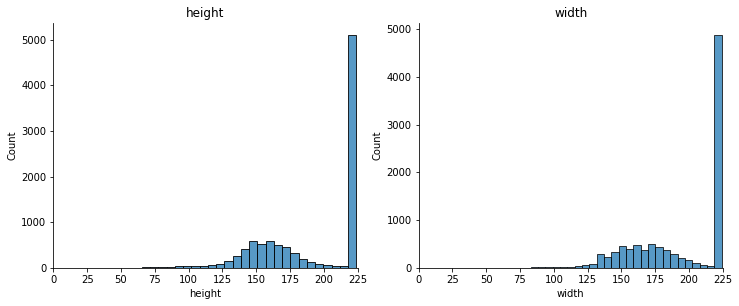

In [15]:
figure = plt.figure(figsize=(12, 4.5))
for i, column in enumerate(['height', 'width']):
    ax = plt.subplot(1, 2, i+1)
    ax.set_title(column)
    ax.set_xlim(0, 225)
    sns.histplot(data=df_size_channel, x=column)
    sns.despine()

In [17]:
train_df

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3
...,...,...,...,...
3932,ffa3259fff8e6f3818a1,1850,b187c294b0550acf049a,3
3933,ffd4d361756587883e48,1670,ad49a044770a48f860a6,1
3934,ffd794b7b311b7b7fd92,1789,f030a01b480b18a27be2,2
3935,ffe49bba69d06446de7e,1805,f5287bc84a05aada1d17,3


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3937 entries, 0 to 3936
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   object_id      3937 non-null   object
 1   sorting_date   3937 non-null   int64 
 2   art_series_id  3937 non-null   object
 3   target         3937 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 123.2+ KB


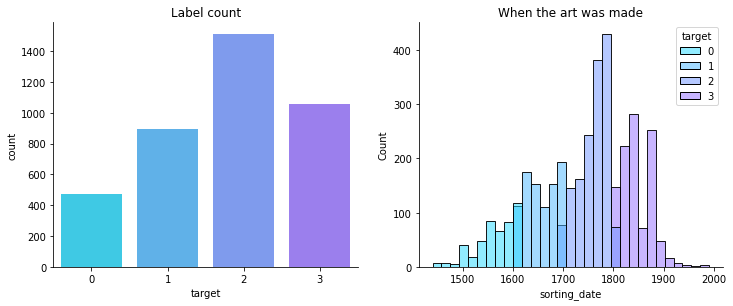

In [22]:
fig = plt.figure(figsize=(12, 4.5))
plt.subplot(1,2,1)
ax = sns.countplot(data=train_df, x='target', palette=sns.color_palette('cool'))
ax.set_title('Label count')

plt.subplot(1,2,2)
ax = sns.histplot(data=train_df, x='sorting_date', hue='target', 
                  palette=sns.color_palette('cool')[:train_df['target'].nunique()])
ax.set_title('When the art was made')
sns.despine()

In [27]:
sorting_date_stat = train_df.groupby('target')['sorting_date'].describe().sort_index()
for column in ('count', 'min', 'max'):
    sorting_date_stat[column] = sorting_date_stat[column].astype(int)
sorting_date_stat

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,475,1563.93,36.92,1440,1542.00,1574.00,1599.00,1600
1,896,1656.53,31.70,1601,1628.00,1655.00,1683.00,1700
2,1511,1760.01,27.40,1701,1741.00,1770.00,1782.00,1800
3,1055,1845.60,29.25,1801,1823.00,1841.00,1870.00,1991
